<a href="https://colab.research.google.com/github/its-amrita-sarkar-01/Iris/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Information

The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other, the latter are not linearly separable from each other.

#### Attribute Information:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- class: --Iris Setosa -- Iris Versicolour -- Iris Virginica

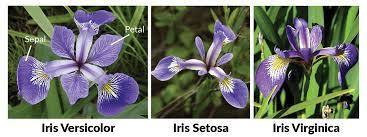

In [1]:
from IPython.display import Image
img = '/content/iris.png'
Image(img)

In [2]:
# import modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the dataset
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# drop the id column
df.drop('Id', axis = 1, inplace = True)

In [6]:
# display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# to display basic info of the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# to display number of samples on each class
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Preprocessing the dataset

In [9]:
# check for the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

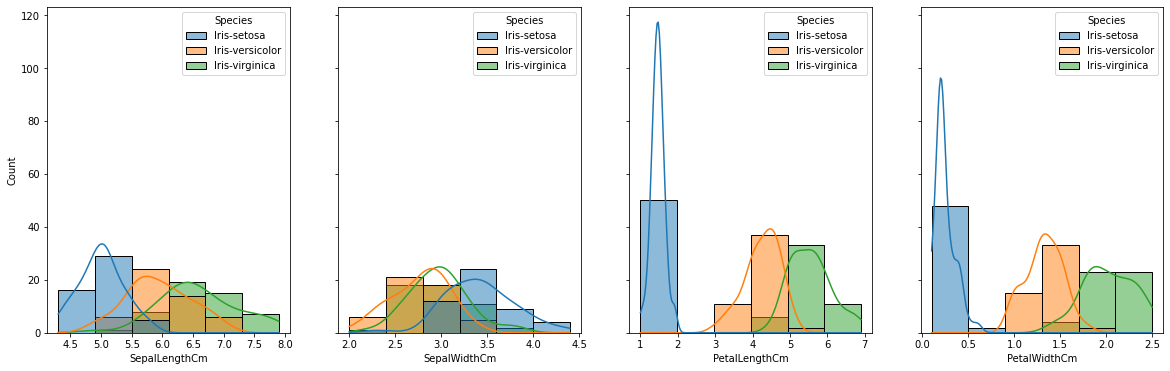

In [10]:
# histogram
_, axes = plt.subplots(1, 4, sharey=True, figsize=(20, 6))
sns.histplot(x = 'SepalLengthCm', hue = 'Species', kde = True, bins = 6, data = df, ax=axes[0])
sns.histplot(x = 'SepalWidthCm', hue = 'Species', kde = True, bins = 6, data = df, ax=axes[1])
sns.histplot(x = 'PetalLengthCm', hue = 'Species', kde = True, bins = 6, data = df, ax=axes[2])
sns.histplot(x = 'PetalWidthCm', hue = 'Species', kde = True, bins = 6, data = df, ax=axes[3]);

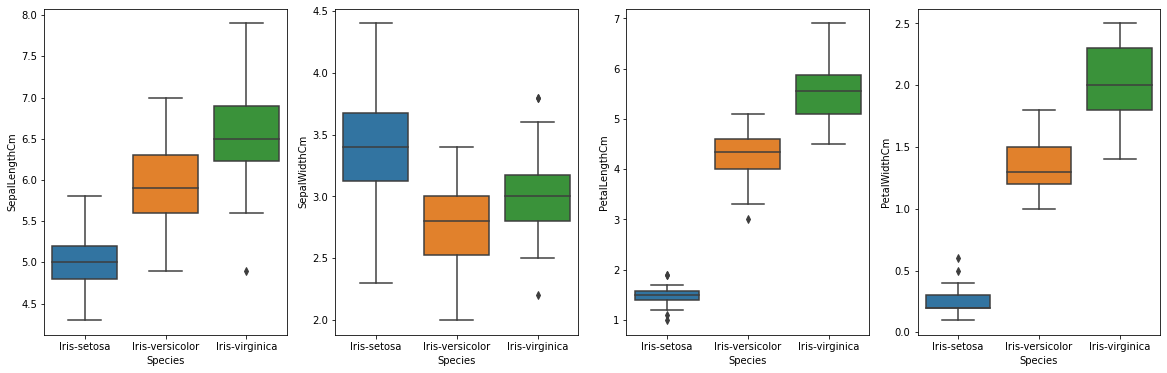

In [11]:
# boxplot
_, axes = plt.subplots(1, 4, figsize=(20, 6))
sns.boxplot(y = 'SepalLengthCm', x = 'Species', data = df, ax=axes[0])
sns.boxplot(y = 'SepalWidthCm', x = 'Species', data = df, ax=axes[1])
sns.boxplot(y = 'PetalLengthCm', x = 'Species', data = df, ax=axes[2])
sns.boxplot(y = 'PetalWidthCm', x = 'Species', data = df, ax=axes[3]);

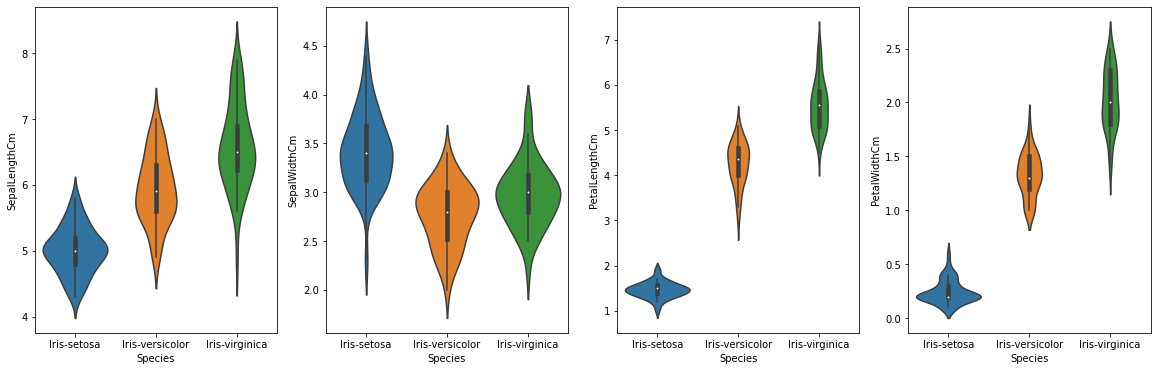

In [12]:
# boxplot
_, axes = plt.subplots(1, 4, figsize=(20, 6))
sns.violinplot(y = 'SepalLengthCm', x = 'Species', data = df, ax=axes[0])
sns.violinplot(y = 'SepalWidthCm', x = 'Species', data = df, ax=axes[1])
sns.violinplot(y = 'PetalLengthCm', x = 'Species', data = df, ax=axes[2])
sns.violinplot(y = 'PetalWidthCm', x = 'Species', data = df, ax=axes[3]);

In [13]:
# scatterplot
colors = ['#FF7F50', '#00EEEE', '#BF3EFF']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

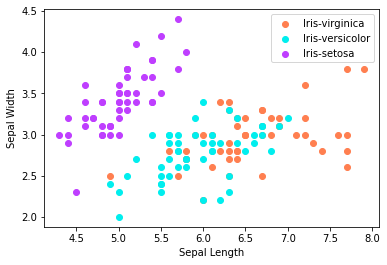

In [14]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend();

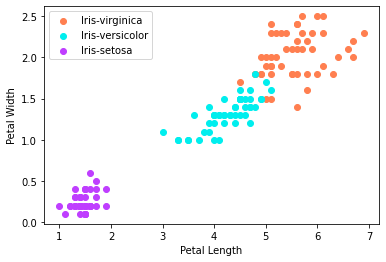

In [15]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend();

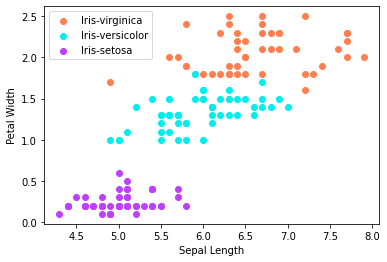

In [16]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend();

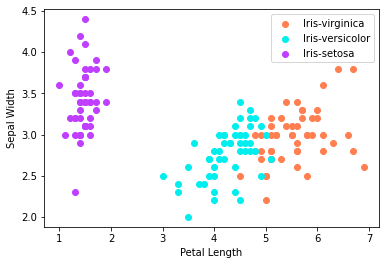

In [17]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend();

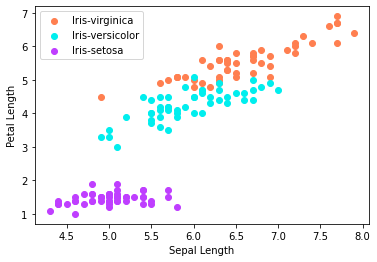

In [18]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend();

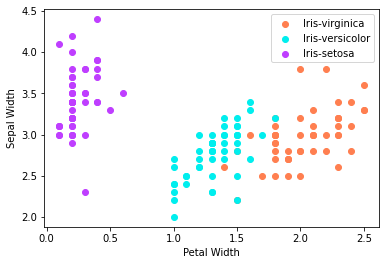

In [19]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalWidthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.legend();

### Pairplot provides the convenience to analyze the bivariate plots all at once

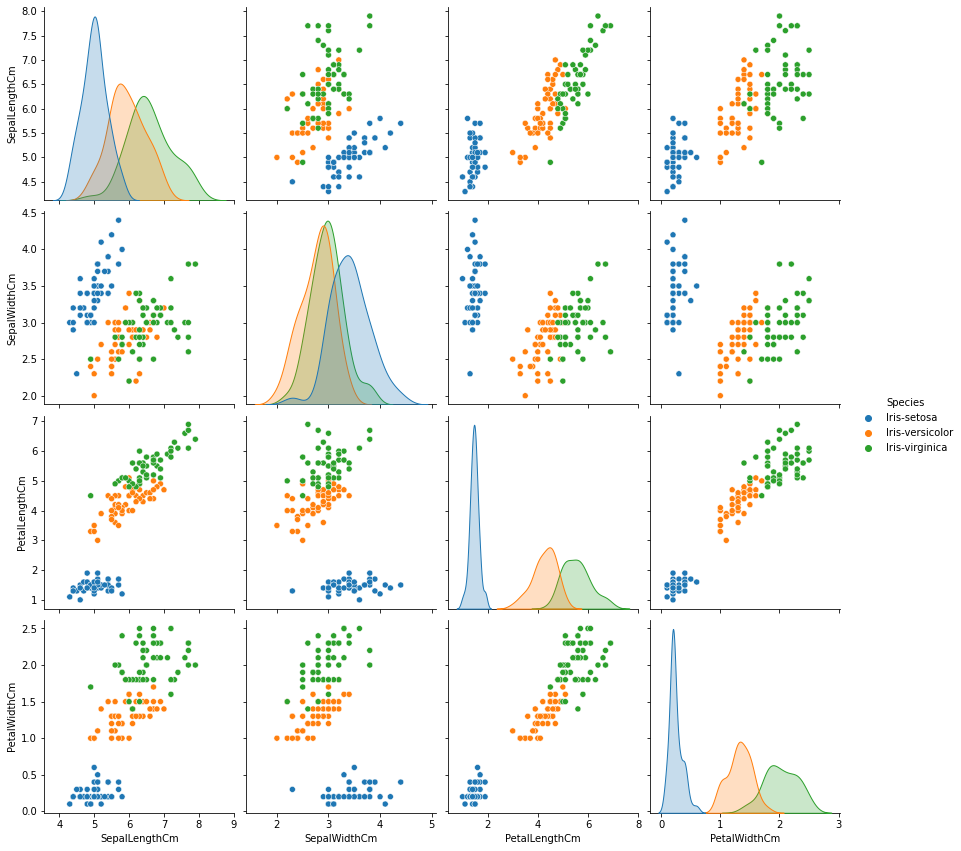

In [20]:
# Pairplot
sns.pairplot(df, hue = 'Species', height = 3);

In [21]:
# Coorelation Matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


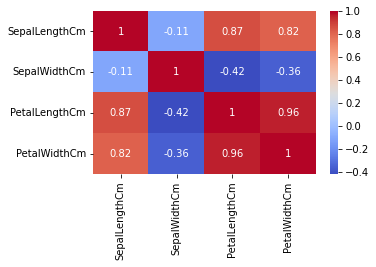

In [22]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (5, 3))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm');

## Statistical Analysis

In [23]:
import scipy.stats as stats

for k in ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']:
  z, pval = stats.normaltest(df[k])
  if(pval<0.05):
    print('%s has a p-value of %f - distribution is not normal' % (k, pval))
  else:
    print('%s has a p-value of %f' % (k, pval))

SepalLengthCm has a p-value of 0.056824
SepalWidthCm has a p-value of 0.167241
PetalLengthCm has a p-value of 0.000000 - distribution is not normal
PetalWidthCm has a p-value of 0.000000 - distribution is not normal


### Label Encoder

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [26]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:4]
Y = df['Species']

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

### Logistic Regression

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
model.fit(x_train, y_train)

LogisticRegression()

In [31]:
# print metric to get performance
print('Accuracy', model.score(x_test, y_test) * 100)

Accuracy 97.77777777777777


In [32]:
print( 'Actual:\t\t',y_test.tolist())

y_pred_log = model.predict(x_test)
print('Predictions:\t',y_pred_log.tolist())

Actual:		 [0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1]
Predictions:	 [0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1]


[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Verginica')]

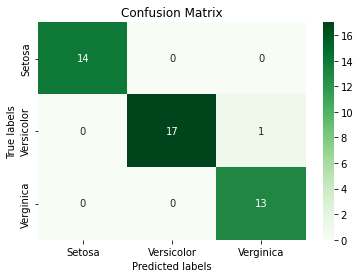

In [33]:
labels = ['Setosa', 'Versicolor', 'Verginica']
cm = confusion_matrix(y_test, y_pred_log)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [34]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### KNN

In [35]:
# KNN - K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 7)

In [36]:
model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
# print metric to get performance
print('Accuracy', model1.score(x_test, y_test) * 100)

Accuracy 97.77777777777777


In [38]:
print( 'Actual:\t\t',y_test.tolist())

y_pred_knn = model1.predict(x_test)
print('Predictions:\t',y_pred_knn.tolist())

Actual:		 [0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1]
Predictions:	 [0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1]


[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Verginica')]

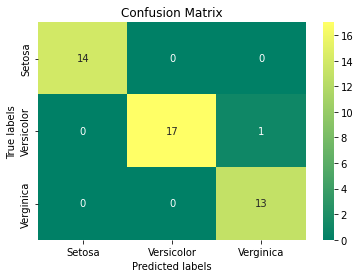

In [39]:
labels = ['Setosa', 'Versicolor', 'Verginica']
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'summer'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [40]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Decision Tree

In [41]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth = 7, min_samples_split = 5)

In [42]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=5)

In [43]:
# print metric to get performance
print('Accuracy', model2.score(x_test, y_test) * 100)

Accuracy 95.55555555555556


In [44]:
print( 'Actual:\t\t',y_test.tolist())

y_pred_dt = model2.predict(x_test)
print('Predictions:\t',y_pred_dt.tolist())

Actual:		 [0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1]
Predictions:	 [0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1]


[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Verginica')]

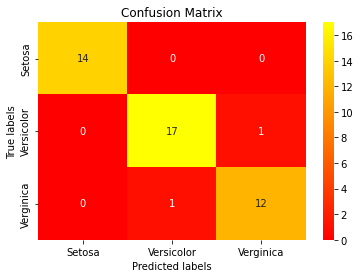

In [45]:
labels = ['Setosa', 'Versicolor', 'Verginica']
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'autumn'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [46]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [47]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

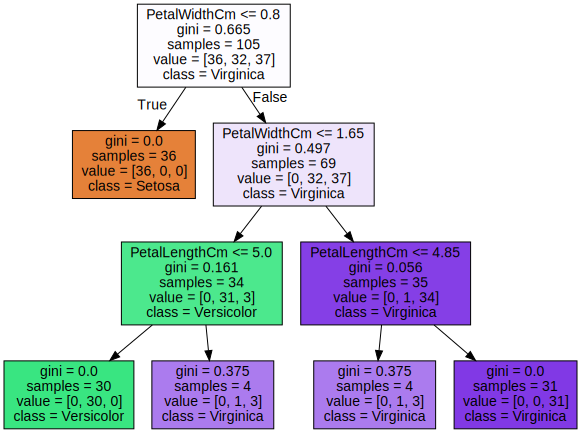

In [48]:
# Visualization of the decision tree
graph = Source(tree.export_graphviz(model2, out_file=None
   , feature_names=x_train.columns, class_names=['Setosa', 'Versicolor', 'Virginica'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))